# RwHealth: Data Science Assessment

The aim of this assessment is to build 3 machine learning models to predict the likelihood of a readmission in patients as well as evaluating each model, and determining which of the models is best.

This Inpatients dataset contains the following features:

* 'patient_id'
* 'ServiceOnAdmission'
* 'seen_by_trust_before'
* 'ServiceGroupOnAdmission'
* 'WardType'
* 'PreviousServiceGroup'
* 'PreviousWardType'
* 'DaysSinceLastCare'
* 'DaysUntilNextCare'
* 'CaresCount'
* 'CareCumSum'
* 'NextWardType'
* 'ReadmitFlag',
* 'ReadmitCount'
* 'ReadmitCumSum'
* 'DaysSinceCareEnd'
* 'TARGET_ReadmitIn6Months'
* 'CareLengthDays'
* 'AverageCarePerYear',
* 'AverageReadmitsPerYear'
* 'CareCount_last1month',
* 'CareCount_last3months'
* 'CareCount_last6months',
* 'CareCount_last9months'
* 'CareCount_last1year'
* 'CareCount_last2years'
* 'ReadmissionCount_last1month'
* 'ReadmissionCount_last3months'
* 'ReadmissionCount_last6months'
* 'ReadmissionCount_last9months'
* 'ReadmissionCount_last1year'
* 'ReadmissionCount_last2years'
* 'diagnosis_code'



## Import libraries   

In [404]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load in Data
**Read in the Inpatients.csv file and set it to a data frame called df.**

In [405]:
df = pd.read_csv (r'https://raw.githubusercontent.com/Draper-Dash/dsp-training/main/Inpatients.csv')
print('Size of the dataset is:',df.shape) #read the size of the dataset

Size of the dataset is: (5938, 33)


**Check the head of df**

In [406]:
df.head()

,patient_id,ServiceOnAdmission,seen_by_trust_before,ServiceGroupOnAdmission,WardType,PreviousServiceGroup,PreviousWardType,DaysSinceLastCare,DaysUntilNextCare,CaresCount,...,CareCount_last9months,CareCount_last1year,CareCount_last2years,ReadmissionCount_last1month,ReadmissionCount_last3months,ReadmissionCount_last6months,ReadmissionCount_last9months,ReadmissionCount_last1year,ReadmissionCount_last2years,diagnosis_code
0,1,Service 107,False,ADULT INPATIENT,Adult Acute,ADULT INPATIENT,Adult Acute,261.0,62.0,17,...,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Z91
1,2,Service 127,False,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,NaN,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,F30
2,3,Service 40,False,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,NaN,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4,Service 89,False,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,NaN,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,F60
4,5,Service 125,False,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,51.0,2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Z11


**Use info(), describe(), and columns() on ad_data**

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    5938 non-null   int64  
 1   ServiceOnAdmission            5938 non-null   object 
 2   seen_by_trust_before          5938 non-null   bool   
 3   ServiceGroupOnAdmission       5938 non-null   object 
 4   WardType                      5938 non-null   object 
 5   PreviousServiceGroup          982 non-null    object 
 6   PreviousWardType              5938 non-null   object 
 7   DaysSinceLastCare             982 non-null    float64
 8   DaysUntilNextCare             1093 non-null   float64
 9   CaresCount                    5938 non-null   int64  
 10  CareCumSum                    5938 non-null   int64  
 11  NextWardType                  1093 non-null   object 
 12  ReadmitFlag                   5938 non-null   int64  
 13  Rea

In [408]:
df.describe()

,patient_id,DaysSinceLastCare,DaysUntilNextCare,CaresCount,CareCumSum,ReadmitFlag,ReadmitCount,ReadmitCumSum,DaysSinceCareEnd,TARGET_ReadmitIn6Months,...,CareCount_last6months,CareCount_last9months,CareCount_last1year,CareCount_last2years,ReadmissionCount_last1month,ReadmissionCount_last3months,ReadmissionCount_last6months,ReadmissionCount_last9months,ReadmissionCount_last1year,ReadmissionCount_last2years
count,5938.000000,982.000000,1093.000000,5938.000000,5938.000000,5938.000000,5938.000000,5938.000000,5764.000000,5350.000000,...,5764.000000,5764.000000,5764.000000,5764.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000,5924.000000
mean,2969.500000,326.128310,313.775846,1.599192,1.294375,0.084372,0.341361,0.166891,1151.564018,0.094019,...,0.994969,1.055690,1.096461,1.189799,0.039669,0.088116,0.128123,0.158677,0.177752,0.213201
std,1714.297281,385.912504,394.577836,1.379979,0.912496,0.277968,1.024301,0.680785,662.607180,0.291882,...,0.363828,0.383397,0.433774,0.605711,0.215740,0.362892,0.481947,0.569179,0.633606,0.776983
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1485.250000,50.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000,587.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2969.500000,172.000000,154.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1151.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4453.750000,487.000000,428.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1734.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5938.000000,2185.000000,2077.000000,19.000000,19.000000,1.000000,16.000000,16.000000,2261.000000,1.000000,...,6.000000,6.000000,6.000000,8.000000,3.000000,5.000000,6.000000,6.000000,6.000000,8.000000


In [409]:
df.columns

Index(['patient_id', 'ServiceOnAdmission', 'seen_by_trust_before',
       'ServiceGroupOnAdmission', 'WardType', 'PreviousServiceGroup',
       'PreviousWardType', 'DaysSinceLastCare', 'DaysUntilNextCare',
       'CaresCount', 'CareCumSum', 'NextWardType', 'ReadmitFlag',
       'ReadmitCount', 'ReadmitCumSum', 'DaysSinceCareEnd',
       'TARGET_ReadmitIn6Months', 'CareLengthDays', 'AverageCarePerYear',
       'AverageReadmitsPerYear', 'CareCount_last1month',
       'CareCount_last3months', 'CareCount_last6months',
       'CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years',
       'ReadmissionCount_last1month', 'ReadmissionCount_last3months',
       'ReadmissionCount_last6months', 'ReadmissionCount_last9months',
       'ReadmissionCount_last1year', 'ReadmissionCount_last2years',
       'diagnosis_code'],
      dtype='object')

Convert

In [410]:
df['seen_by_trust_before'] = df['seen_by_trust_before'].astype('int64')
df.head()

,patient_id,ServiceOnAdmission,seen_by_trust_before,ServiceGroupOnAdmission,WardType,PreviousServiceGroup,PreviousWardType,DaysSinceLastCare,DaysUntilNextCare,CaresCount,...,CareCount_last9months,CareCount_last1year,CareCount_last2years,ReadmissionCount_last1month,ReadmissionCount_last3months,ReadmissionCount_last6months,ReadmissionCount_last9months,ReadmissionCount_last1year,ReadmissionCount_last2years,diagnosis_code
0,1,Service 107,0,ADULT INPATIENT,Adult Acute,ADULT INPATIENT,Adult Acute,261.0,62.0,17,...,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Z91
1,2,Service 127,0,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,NaN,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,F30
2,3,Service 40,0,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,NaN,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4,Service 89,0,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,NaN,1,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,F60
4,5,Service 125,0,ADULT INPATIENT,Adult Acute,NaN,Adult Acute,NaN,51.0,2,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Z11


## Exploratory Analysis


**Create a histogram of some of the care count features**

Text(0, 0.5, '#')

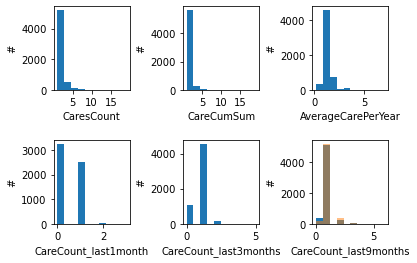

In [411]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.7) #define the suplot spacing

plt.subplot(2, 3, 1)
plt.hist(df.loc[:,'CaresCount'],alpha=1)
plt.xlabel('CaresCount')
plt.ylabel('#')

plt.subplot(2, 3, 2)
plt.hist(df.loc[:,'CareCumSum'],alpha=1)
plt.xlabel('CareCumSum')
plt.ylabel('#')

plt.subplot(2, 3, 3)
plt.hist(df.loc[:,'AverageCarePerYear'],alpha=1)
plt.xlabel('AverageCarePerYear')
plt.ylabel('#')

plt.subplot(2, 3, 4)
plt.hist(df.loc[:,'CareCount_last1month'],alpha=1)
plt.xlabel('CareCount_last1month')
plt.ylabel('#')

plt.subplot(2, 3, 5)
plt.hist(df.loc[:,'CareCount_last3months'],alpha=1)
plt.xlabel('CareCount_last3months')
plt.ylabel('#')

plt.subplot(2, 3, 6)
plt.hist(df.loc[:,'CareCount_last6months'],alpha=1)
plt.xlabel('CareCount_last6months')
plt.ylabel('#')

plt.subplot(2, 3, 6) #overlapping the care count from the last 9 months on top of data from last 6 months for comparison
plt.hist(df.loc[:,'CareCount_last9months'],alpha=.5) 
plt.xlabel('CareCount_last9months')
plt.ylabel('#')



**Create a histogram of some of the readmission features**

Text(0, 0.5, '#')

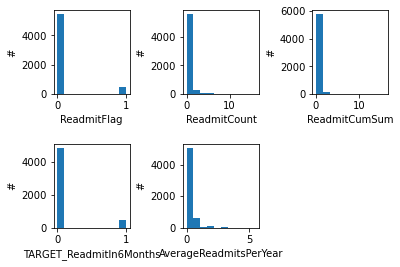

In [412]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.7)

plt.subplot(2, 3, 1)
plt.hist(df.loc[:,'ReadmitFlag'],alpha=1)
plt.xlabel('ReadmitFlag')
plt.ylabel('#')

plt.subplot(2, 3, 2)
plt.hist(df.loc[:,'ReadmitCount'],alpha=1)
plt.xlabel('ReadmitCount')
plt.ylabel('#')

plt.subplot(2, 3, 3)
plt.hist(df.loc[:,'ReadmitCumSum'],alpha=1)
plt.xlabel('ReadmitCumSum')
plt.ylabel('#')

plt.subplot(2, 3, 4)
plt.hist(df.loc[:,'TARGET_ReadmitIn6Months'],alpha=1)
plt.xlabel('TARGET_ReadmitIn6Months')
plt.ylabel('#')

plt.subplot(2, 3, 5)
plt.hist(df.loc[:,'AverageReadmitsPerYear'],alpha=1)
plt.xlabel('AverageReadmitsPerYear')
plt.ylabel('#')



**Finding the best target variable for classification purposes**

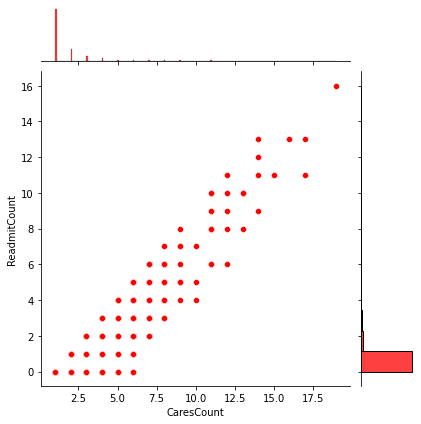

In [413]:
#select variables to include in the analyses 
data_df = df.loc[:,('seen_by_trust_before','CaresCount', 'CareCumSum', 'ReadmitFlag','ReadmitCount', 'ReadmitCumSum', 'DaysSinceCareEnd','TARGET_ReadmitIn6Months', 'CareLengthDays', 'AverageCarePerYear','AverageReadmitsPerYear', 'CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years','ReadmissionCount_last1month', 'ReadmissionCount_last3months','ReadmissionCount_last6months', 'ReadmissionCount_last9months','ReadmissionCount_last1year', 'ReadmissionCount_last2years')]
#select inupt variables: ReadmitFlag is chosen as the target variable
data_df = data_df[['ReadmitCount','seen_by_trust_before','CaresCount', 'CareCumSum','DaysSinceCareEnd','CareLengthDays', 'AverageCarePerYear','CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years']]

sns.jointplot(x='CaresCount',y='ReadmitCount',data=data_df,color='red');


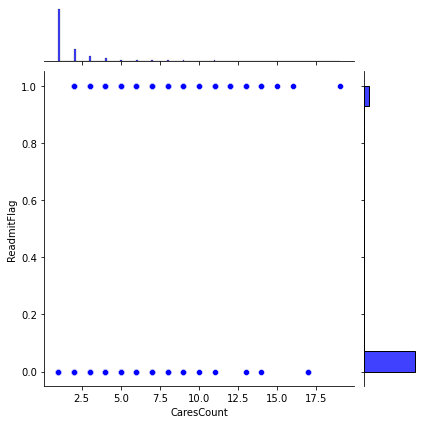

In [414]:
#select variables to include in the analyses 
data_df = df.loc[:,('seen_by_trust_before','CaresCount', 'CareCumSum', 'ReadmitFlag','ReadmitCount', 'ReadmitCumSum', 'DaysSinceCareEnd','TARGET_ReadmitIn6Months', 'CareLengthDays', 'AverageCarePerYear','AverageReadmitsPerYear', 'CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years','ReadmissionCount_last1month', 'ReadmissionCount_last3months','ReadmissionCount_last6months', 'ReadmissionCount_last9months','ReadmissionCount_last1year', 'ReadmissionCount_last2years')]
#select inupt variables: ReadmitFlag is chosen as the target variable
data_df = data_df[['ReadmitFlag','seen_by_trust_before','CaresCount', 'CareCumSum','DaysSinceCareEnd','CareLengthDays', 'AverageCarePerYear','CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years']]

sns.jointplot(x='CaresCount',y='ReadmitFlag',data=data_df,color='blue');

**Using Principal Component Analysis (PCA) to define the most important features for analysis**

In [415]:
from sklearn.preprocessing import StandardScaler

In [416]:
#select variables to include in the analyses 
data_df = df.loc[:,('seen_by_trust_before','CaresCount', 'CareCumSum', 'ReadmitFlag','ReadmitCount', 'ReadmitCumSum', 'DaysSinceCareEnd','TARGET_ReadmitIn6Months', 'CareLengthDays', 'AverageCarePerYear','AverageReadmitsPerYear', 'CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years','ReadmissionCount_last1month', 'ReadmissionCount_last3months','ReadmissionCount_last6months', 'ReadmissionCount_last9months','ReadmissionCount_last1year', 'ReadmissionCount_last2years')]
#select inupt variables: ReadmitFlag is chosen as the target variable
data_df = data_df[['ReadmitFlag','seen_by_trust_before','CaresCount', 'CareCumSum','DaysSinceCareEnd','CareLengthDays', 'AverageCarePerYear','CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years']]

data_df = data_df.fillna(0)
data_df = data_df.replace([np.inf -np.inf], 0)

scaler = StandardScaler()
scaler.fit(data_df)


StandardScaler()

In [417]:
scaled_data = scaler.transform(data_df)

In [418]:
from sklearn.decomposition import PCA

In [419]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape

(5938, 13)

In [420]:
x_pca.shape

(5938, 2)

Text(0, 0.5, 'Second Principal Component')

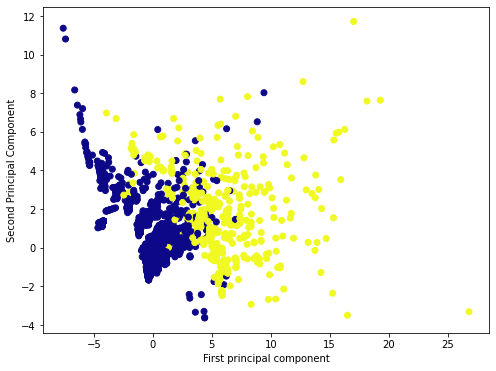

In [421]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=data_df['ReadmitFlag'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [422]:
pca.components_

array([[ 0.32218746, -0.02020071,  0.30050958,  0.30244194,  0.00922269,
        -0.13518336,  0.26478926,  0.11082636,  0.21921403,  0.33285845,
         0.38736817,  0.39844674,  0.3815641 ],
       [ 0.21069545, -0.04923424,  0.3032398 ,  0.33504955, -0.09170537,
         0.46205842,  0.05598768, -0.42057923, -0.46472951, -0.29018111,
        -0.1109848 ,  0.01109636,  0.18553198]])

<AxesSubplot:>

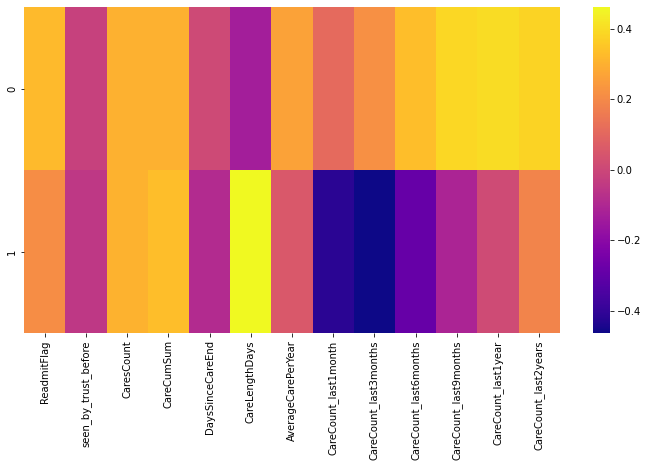

In [423]:
df_comp = pd.DataFrame(pca.components_,columns=data_df.columns)

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

**PCA output conclusion:**
'seen_by_trust_before' and 'DaysSinceCareEnd' will be excluded from further analyses

**Plotting the heatmap of the correlation between variables for better understanding the features relationship**

<AxesSubplot:>

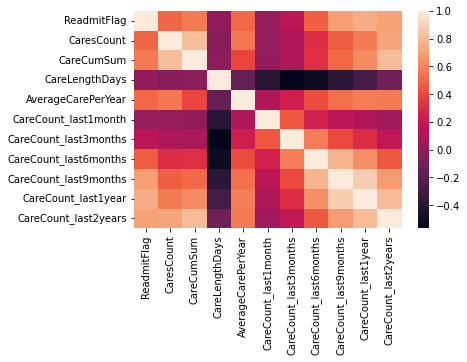

In [424]:
#select variables to include in the analyses 
data_df = df.loc[:,('seen_by_trust_before','CaresCount', 'CareCumSum', 'ReadmitFlag','ReadmitCount', 'ReadmitCumSum', 'DaysSinceCareEnd','TARGET_ReadmitIn6Months', 'CareLengthDays', 'AverageCarePerYear','AverageReadmitsPerYear', 'CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years','ReadmissionCount_last1month', 'ReadmissionCount_last3months','ReadmissionCount_last6months', 'ReadmissionCount_last9months','ReadmissionCount_last1year', 'ReadmissionCount_last2years')]
#select inupt variables: ReadmitFlag is chosen as the target variable
data_df = data_df[['ReadmitFlag','CaresCount', 'CareCumSum','CareLengthDays', 'AverageCarePerYear','CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years']]


sns.heatmap(data_df.corr())

**Using pairplot to better understand the relatinship between input variables and the target variable**

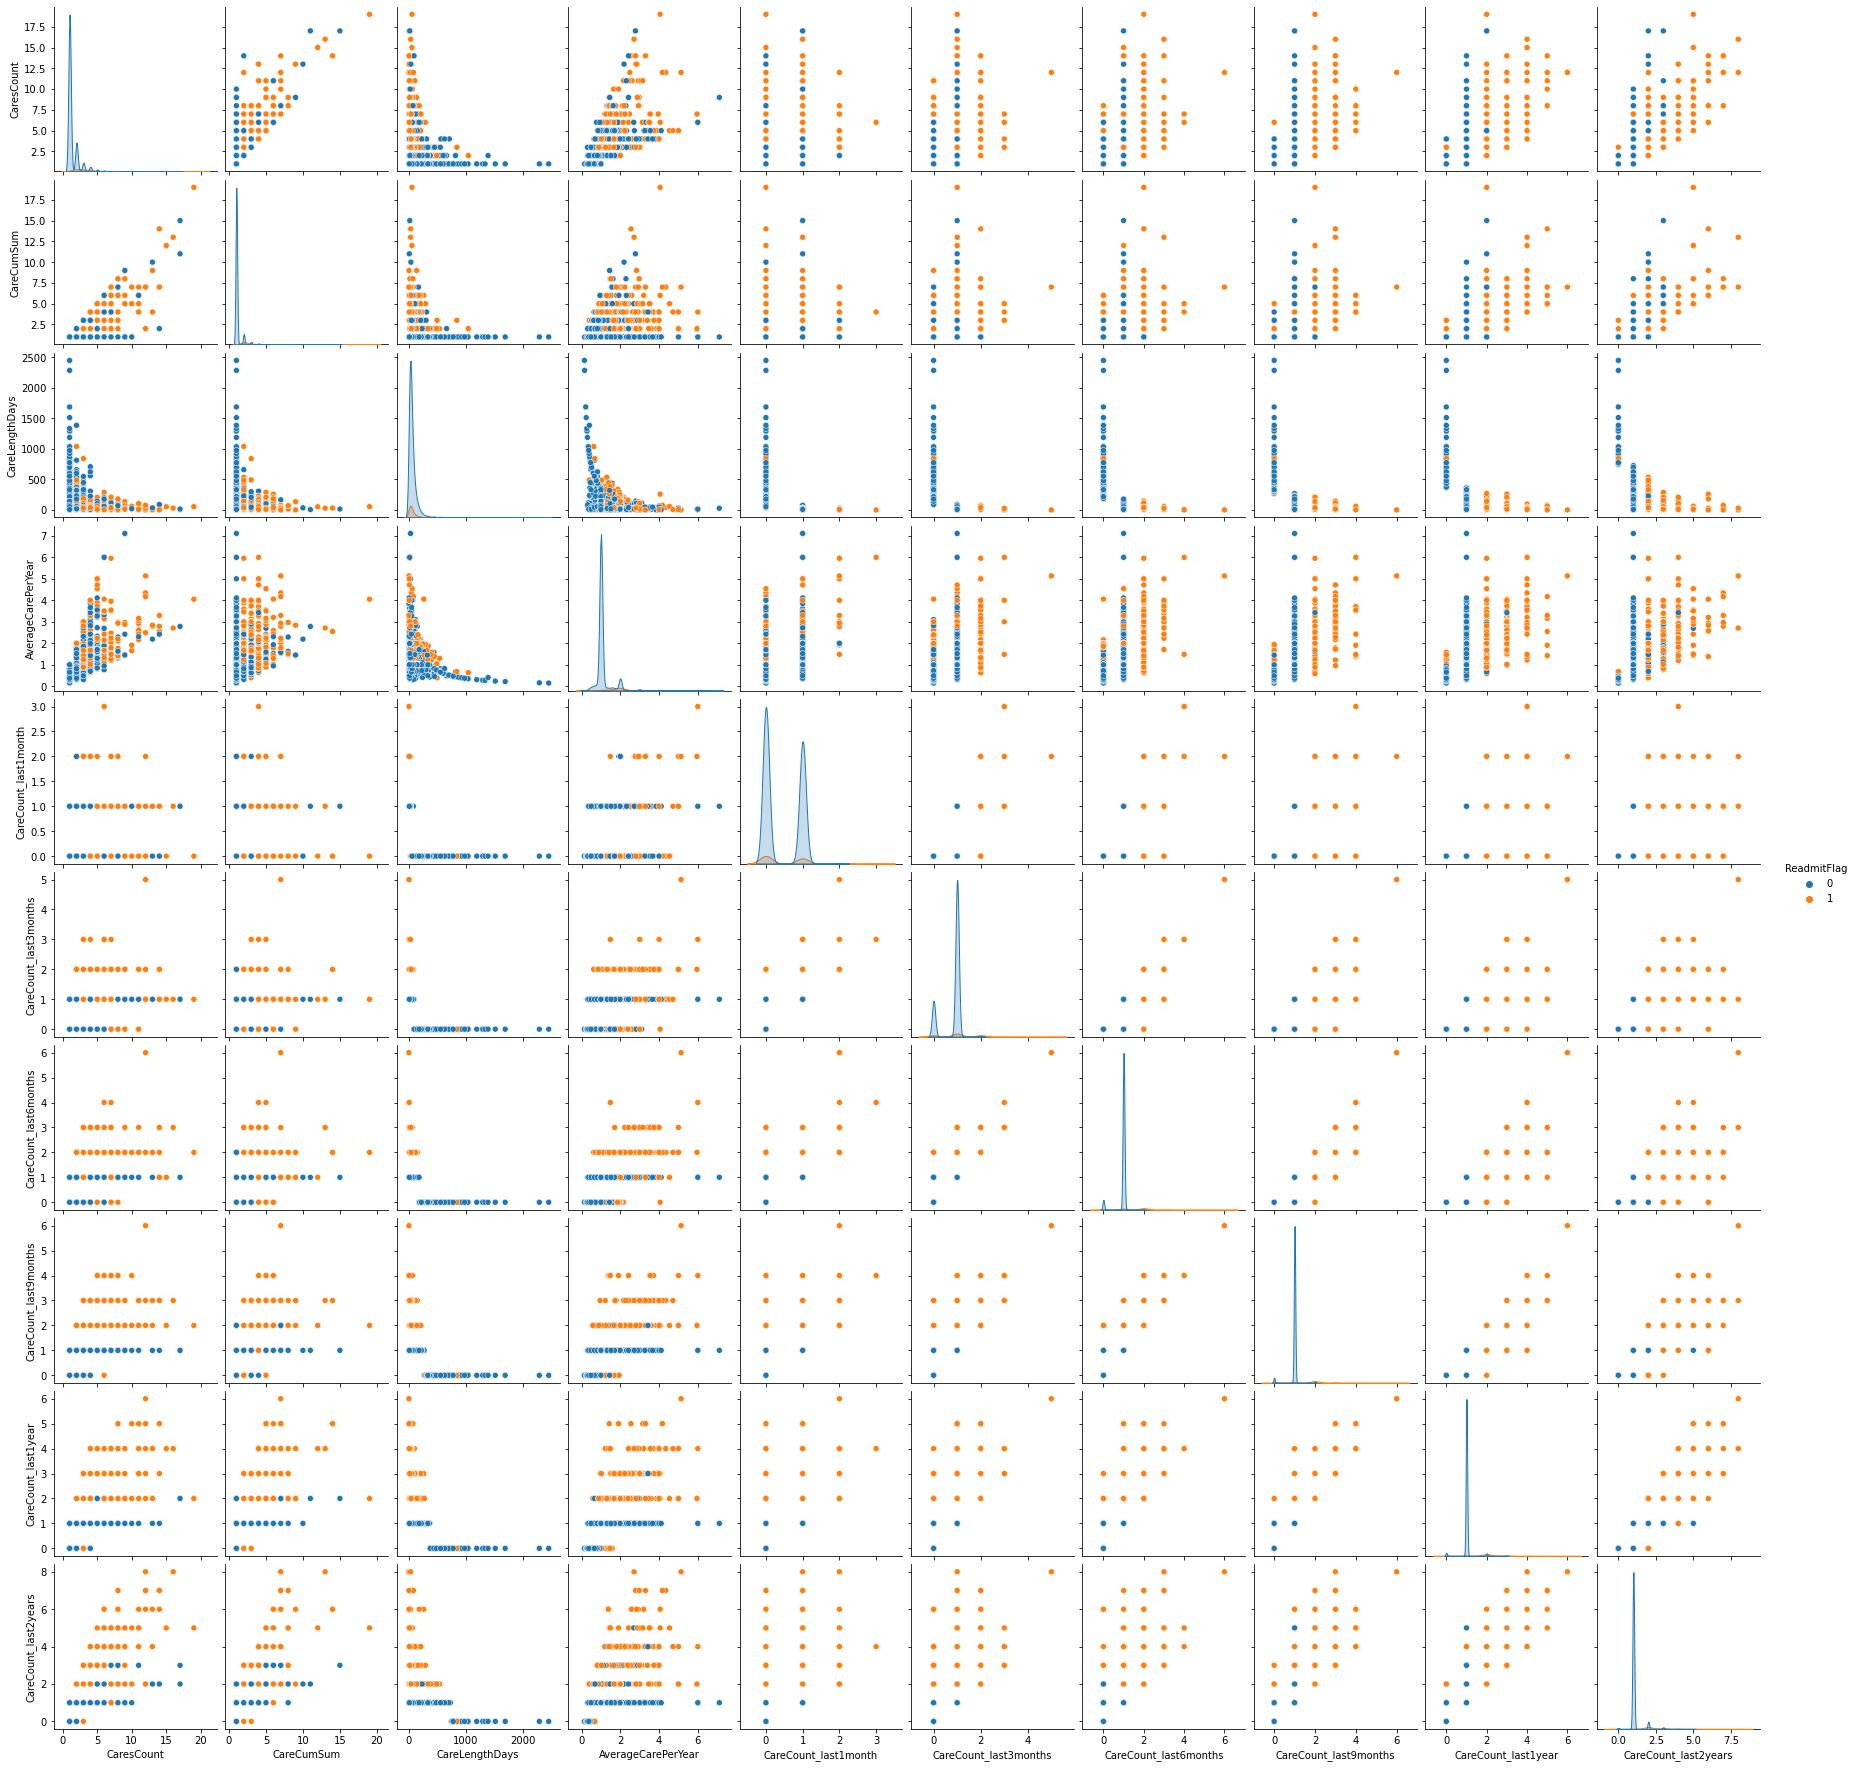

In [425]:
sns.pairplot(data_df,hue='ReadmitFlag',palette='tab10')


# Run the machine learning models  


## Logistic Regression

**Split the data into training set and testing set using train_test_split**

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
#replace NaN and inf values with zero
data_df = data_df.fillna(0)
data_df = data_df.replace([np.inf -np.inf], 0)

X = data_df[['CaresCount', 'CareCumSum','CareLengthDays', 'AverageCarePerYear','CareCount_last1month','CareCount_last3months', 'CareCount_last6months','CareCount_last9months', 'CareCount_last1year', 'CareCount_last2years']]
y = data_df['ReadmitFlag']


In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Train and fit a logistic regression model on the training set.**

In [429]:
from sklearn.linear_model import LogisticRegression

In [430]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

### Predictions and Evaluations: Logistic Regression
**Predict values for the testing data.**

In [431]:
predictions = logmodel.predict(X_test)

In [432]:
from sklearn.metrics import classification_report,confusion_matrix

**Create a classification report for the model.**

In [433]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1782
           1       0.91      0.83      0.86       178

    accuracy                           0.98      1960
   macro avg       0.95      0.91      0.93      1960
weighted avg       0.98      0.98      0.98      1960

[[1767   15]
 [  31  147]]


**Prediction of the likelihood of a readmission in patients**

In [434]:
logmodel.predict_proba(X)[:,1]

array([0.95275007, 0.00473794, 0.00919795, ..., 0.00980536, 0.00645754,
       0.00444303])

## Decision Tree

**Train and fit a decision tree model on the training set.**

In [435]:
from sklearn.tree import DecisionTreeClassifier

In [436]:
dtree = DecisionTreeClassifier()

In [437]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluations: Decision Tree
**Predict values for the testing data.**

In [438]:
predictions = dtree.predict(X_test)

In [439]:
from sklearn.metrics import classification_report,confusion_matrix

In [440]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1782
           1       0.92      0.89      0.90       178

    accuracy                           0.98      1960
   macro avg       0.95      0.94      0.95      1960
weighted avg       0.98      0.98      0.98      1960

[[1768   14]
 [  20  158]]


**Prediction of the likelihood of a readmission in patients**

In [456]:
dtree.predict_proba(X)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

## Random Forest

**Train and fit a random forest model on the training set.**

In [442]:
from sklearn.ensemble import RandomForestClassifier

In [443]:
rfc = RandomForestClassifier(n_estimators=600)

In [444]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

### Predictions and Evaluations: Random Forest
**Predict values for the testing data.**

In [445]:
predictions = rfc.predict(X_test)

In [446]:
from sklearn.metrics import classification_report,confusion_matrix

In [447]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1782
           1       0.92      0.89      0.91       178

    accuracy                           0.98      1960
   macro avg       0.96      0.94      0.95      1960
weighted avg       0.98      0.98      0.98      1960

[[1769   13]
 [  20  158]]


**Prediction of the likelihood of a readmission in patients**

In [460]:
rfc.predict_proba(X)[:,1]

array([0.12, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

## Support Vector Machine

**Train and fit a SVM model on the training set.**

In [461]:
from sklearn.svm import SVC

In [462]:
svc_model = SVC()

In [463]:
svc_model.fit(X_train,y_train)

SVC()

### Predictions and Evaluations: Random Forest
**Predict values for the testing data.**

In [464]:
predictions = svc_model.predict(X_test)

In [465]:
from sklearn.metrics import classification_report,confusion_matrix

In [466]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1782
           1       0.00      0.00      0.00       178

    accuracy                           0.91      1960
   macro avg       0.45      0.50      0.48      1960
weighted avg       0.83      0.91      0.87      1960

[[1782    0]
 [ 178    0]]


# Conclusion

Amongst all the 4 classifiers used here (Logistic Regression, Decision Tree, Random Forest and SVM), SVM showed the lowest performance whilst predicting zero chances of readmission across all patients. Whilst the precision and recall measures for the other 3 classifiers were high, the Random Forest classifier performed best amongst the other two classifiers in terms of average precision and recall and the number of mislabled points. 

However, it is important to note that looking at the Inpatients dataset, it is clear that there is an imbalance in the instances where there was a readmission (178) and instances without readmission (1782). In retrospect, it would have been better to increase the number of instances with readmission equal to 1 (e.g., using bootstrapping methods) to acquire a more balanced dataset.

Kind regard,
Mahtab Farahbakhsh.

